# MOwNiT - Wybrane zagadnienia algebry liniowej i faktoryzacja

Biblioteką w pythonie do algebry liniowej są:
- `numpy.linalg` https://numpy.org/doc/stable/reference/routines.linalg.html
- `scipy.linalg` https://docs.scipy.org/doc/scipy/reference/linalg.html


In [1]:
import numpy as np
import scipy as sc

### Sposoby rozwiązania równań macierzowych Ax=b

In [2]:
A=np.random.randint(0,10,(4,4))
print(A)

b=np.random.randint(0,10,4)
print(b)

[[0 6 7 7]
 [8 8 9 5]
 [0 5 0 3]
 [0 3 6 2]]
[3 7 7 8]


Metoda macierzy odwrotnej:
$$Ax=b\ \Rightarrow\ x=A^{-1}b$$

In [3]:
#mozemy policzyc odwrotność macierzy i wymnożyć
# uwaga: nieefektywne!
(np.linalg.inv(A)).dot(b)

array([-1.27631579,  3.26315789,  0.73684211, -3.10526316])

In [4]:
#najlepiej używać dedykowanej funkcji solve
x=np.linalg.solve(A,b)
print(x)

[-1.27631579  3.26315789  0.73684211 -3.10526316]


### Faktoryzacja LU

In [5]:
# W przypadku ogólnej macierzy kwadratowej jest to faktoryzacja LU z pivotem
P,L,U=sc.linalg.lu(A)
print(P) #macierz permutacji
print(L) #dolna trójkątna
print(U) #górna trójkątna

[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[ 1.          0.          0.          0.        ]
 [ 0.          1.          0.          0.        ]
 [ 0.          0.83333333  1.          0.        ]
 [ 0.          0.5        -0.42857143  1.        ]]
[[ 8.          8.          9.          5.        ]
 [ 0.          6.          7.          7.        ]
 [ 0.          0.         -5.83333333 -2.83333333]
 [ 0.          0.          0.         -2.71428571]]


### Faktoryzacja QR


In [6]:
B=np.random.randint(0,10,(10,5))
print(B)

[[2 2 0 9 7]
 [5 4 6 1 6]
 [2 0 4 4 5]
 [1 1 2 4 4]
 [9 8 7 8 2]
 [7 3 4 1 8]
 [5 6 3 0 5]
 [5 0 2 9 2]
 [1 9 0 7 5]
 [2 3 3 0 1]]


In [7]:
# Domyślna faktoryzacja QR macierzy MxN zwraca Q wymiaru MxK, R wymiaru KxN gdzie K=min(M,N)

Q,R=np.linalg.qr(B)
print(Q)
print(R)

[[-0.13514748 -0.05148237  0.30785997 -0.4983876   0.40159434]
 [-0.33786869 -0.02803951 -0.47793289  0.1095806   0.20970223]
 [-0.13514748  0.14985047 -0.52505412 -0.36065297  0.2462611 ]
 [-0.06757374 -0.02574119 -0.2616329  -0.3110565   0.20325231]
 [-0.60816364 -0.13100425 -0.0699944  -0.07579914 -0.61649436]
 [-0.47301616  0.22247739  0.24280749  0.33949166  0.46387387]
 [-0.33786869 -0.22937235  0.14719975  0.39146152  0.1804254 ]
 [-0.33786869  0.37462618  0.34961624 -0.4191137  -0.20833102]
 [-0.06757374 -0.83107255  0.16108326 -0.23722813  0.10299361]
 [-0.13514748 -0.15214879 -0.3145902   0.08123716 -0.10480382]]
[[-14.79864859 -11.01451927 -10.94694553 -11.21724048 -11.75783038]
 [  0.          -9.93379914  -0.04274875  -3.26637253  -3.06963633]
 [  0.           0.          -4.81274933   3.10304005  -0.65585134]
 [  0.           0.           0.         -12.76226739  -3.30020873]
 [  0.           0.           0.           0.           9.4873199 ]]


In [8]:
# jeżeli chcemy otrzymać Q wymiaru MxM, R wymiaru MxN trzeba wybrać mode=`complete`
Qc,Rc=np.linalg.qr(B,mode='complete')
print(Qc)
print(Rc)

[[-1.35147476e-01 -5.14823702e-02  3.07859970e-01 -4.98387603e-01
   4.01594344e-01 -4.58858535e-01 -1.93551410e-01 -3.91055528e-01
  -2.37936722e-01  1.30717755e-01]
 [-3.37868689e-01 -2.80395052e-02 -4.77932893e-01  1.09580599e-01
   2.09702225e-01 -1.68403876e-01 -3.61713627e-01  4.03171954e-01
  -4.70934563e-01 -2.39023332e-01]
 [-1.35147476e-01  1.49850471e-01 -5.25054120e-01 -3.60652974e-01
   2.46261097e-01 -1.56842024e-01  1.72904910e-01 -2.17664324e-02
   6.38858532e-01 -1.72550112e-01]
 [-6.75737378e-02 -2.57411851e-02 -2.61632901e-01 -3.11056498e-01
   2.03252313e-01  5.77978438e-01  4.66383482e-01 -1.80631168e-01
  -4.39291611e-01  1.05234943e-01]
 [-6.08163641e-01 -1.31004246e-01 -6.99943966e-02 -7.57991436e-02
  -6.16494363e-01  2.85326112e-02 -7.31443488e-02 -4.24953398e-01
   8.21177327e-04 -1.88453118e-01]
 [-4.73016165e-01  2.22477386e-01  2.42807485e-01  3.39491665e-01
   4.63873870e-01  4.27280091e-01 -2.56625355e-01 -1.30467331e-01
   2.53611146e-01  8.72083760e-02

### Zastosowanie faktoryzacji do metody najmniejszych kwadratów

Jednym z zastosowań faktoryzacji QR jest użycie jej do metody najmniejszych kwadratów.

Przykład:

Obliczmy dopasowanie wielomianu $$f(x)=a_2*x^2+a_1*x+a_0$$ do punktów (1,1) (2,2) (3,4) (4, 4) (5,3) (6,0)

- Budujemy układ równań wg wzoru $$a_2x_i^2+a_1x_i+a_0=y_i$$:
$$a_2*1^2+a_1*1+a_0=1$$
$$a_2*2^2+a_1*2+a_0=2$$
$$a_2*3^2+a_1*3+a_0=4$$
$$a_2*4^2+a_1*4+a_0=4$$
$$a_2*5^2+a_1*5+a_0=3$$
$$a_2*6^2+a_1*6+a_0=0$$

- Układ ten  nie ma dokładnego rozwiązania. Możemy jednak znaleźć najlepsze przybliżenie, czyli takie $a_i$, które minimalizują odległość:

$$\sqrt{\sum_{i=1}^{6}{(y_i-f(x_i))^2}}=\lVert y-A*a\rVert$$





Jak użyć do tej mimalizacji faktoryzacji QR:

1. Tworzymy macierz A współczynników równania

2. Dokonujemy faktoryzacji QR macierzy A 

3. Mamy równanie:
$$A*a=y$$
Dla $A=QR$:
$$QR*a =y$$
Możemy obydwie strony wymnożyć z lewej przez $Q^T$:
$$R*a =Q^T y$$
$$\begin{pmatrix} R \\ 0 \end{pmatrix} a= Q^T y$$

Poszukiwanym rozwiązaniem jest rozwiązanie równania będącego górną niezerową częścią:
$$R * a= Q^T y[1:n]$$
$$a=R \setminus Q^T y[1:n]$$

Więcej informacji:
- http://www.math.uconn.edu/~leykekhman/courses/MATH3795/Lectures/Lecture_8_Linear_least_squares_orthogonal_matrices.pdf
- http://www.seas.ucla.edu/~vandenbe/133A/lectures/qr.pdf

## Zadanie 1 (2pkt)
Ustal losowe (referencyjne) x rozmiaru 1000 oraz losowe A rozmiaru 1000x1000, policz b=A*x.
Nastepnie rozwiąż równanie Ax=b trzema metodami:
- metodą macierzy odwrotnej
- funkcją `solve`
- z wykorzystaniem wybranej faktoryzacji

Porównaj jakość wyniku (zmierzoną jako długość różnicy wektorów wyniku oraz referencyjnego x) oraz czas wykonania (@timeit).

In [9]:
import timeit

In [10]:
def measure_execution_time(function, *data):
    return timeit.timeit(lambda: function(*data), number=1)

In [11]:
def test_sol(A, b, x_ref, func):
    x_sol = func(A, b)
    assert np.allclose(x_sol, x_ref), "Wrong solution!!!"

    print(f"execution time [s]: {measure_execution_time(func, A, b)}")
    print(f"solution quality: {np.linalg.norm(x_sol - x_ref)}")

In [12]:
low, high,n = 0, 10, 1000
x = np.random.uniform(low, high, size = (n, 1))
A = np.random.uniform(low, high, size = (n, n))
b = A @ x

1. Metoda macierzy odwrotnej

In [13]:
def solve_inv(A, b):
    return np.linalg.inv(A) @ b

test_sol(A, b, x, solve_inv)

execution time [s]: 0.08430441600103222
solution quality: 1.0053583372748998e-08


2. Funkcja ```solve```

In [14]:
def solve_solve(A, b):
    return np.linalg.solve(A, b)

test_sol(A, b, x, solve_solve)

execution time [s]: 0.04326885100090294
solution quality: 5.5813132070100336e-11


3. Faktoryzacja

In [15]:
def solve_factorization(A, b):
    Q, R = sc.linalg.qr(A)
    return np.linalg.inv(R) @ Q.T @ b

test_sol(A, b, x, solve_factorization)

execution time [s]: 0.4979060829991795
solution quality: 2.8425439399487207e-10


## Zadanie 2 (1pkt)
Policz współczynniki wielomianu aproksymującego dowolne dane z poprzednich laboratoriów tworząc wprost układ równań i rozwiązujac go (metoda z użyciem faktoryzacji QR zaprezentowana na tym laboratorium).
Porównaj wyniki z tymi otrzymanymi poprzednio.

In [16]:
deg = 2
low = -1
high = 1
func = np.exp
nodes_cnt = 5
x = np.linspace(low, high, nodes_cnt)
y = func(x)

# Interpolation
coef = np.polyfit(x, y, deg)
y_polyfit = np.polyval(coef, x)

In [17]:
def polyfit_factorization(x, y, deg):
    A = np.vander(x, deg + 1)
    Q, R = np.linalg.qr(A)
    return np.linalg.inv(R) @ Q.T @ y

In [18]:
coef_factorization = polyfit_factorization(x, y, deg)
y_polyfit_factorization = np.polyval(coef_factorization, x)

In [19]:
print(f"y_polyfit: {y_polyfit}")
print(f"y_polyfit_factorization: {y_polyfit_factorization}")
print(f"y_polyfit diff: {np.linalg.norm(y_polyfit - y)}")
print(f"y_polyfit_factorization diff: {np.linalg.norm(y_polyfit_factorization - y)}")

y_polyfit: [0.39355079 0.55704949 0.99441541 1.70564856 2.69074895]
y_polyfit_factorization: [0.39355079 0.55704949 0.99441541 1.70564856 2.69074895]
y_polyfit diff: 0.08448294904673065
y_polyfit_factorization diff: 0.08448294904673058


In [20]:
import matplotlib.pyplot as plt

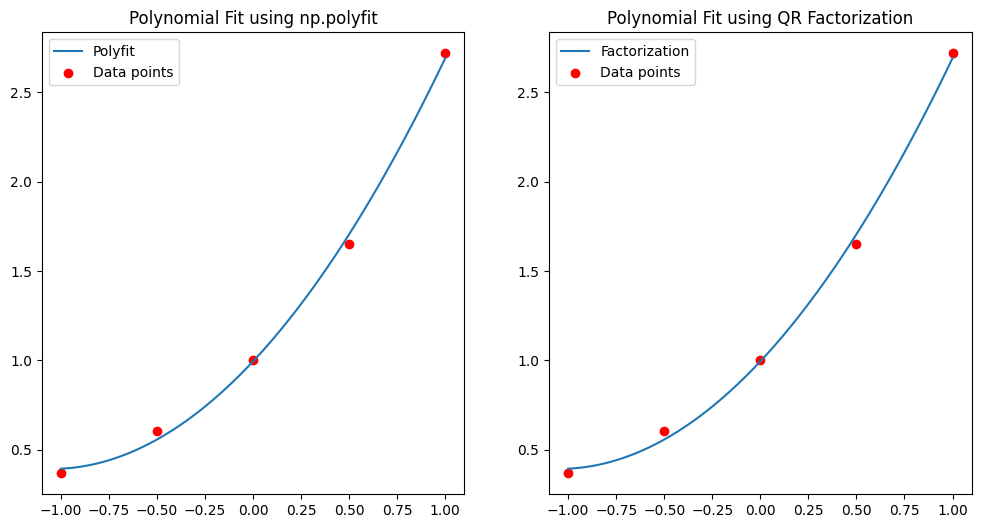

In [22]:
xs = np.linspace(low, high, 100)
ys = np.polyval(coef, xs)
ys_factorization = np.polyval(coef_factorization, xs)

_, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].plot(xs, ys, label="Polyfit")
axes[0].scatter(x, y, color="red", label="Data points")
axes[0].legend()
axes[0].set_title("Polynomial Fit using np.polyfit")

axes[1].plot(xs, ys_factorization, label="Factorization")
axes[1].scatter(x, y, color="red", label="Data points")
axes[1].legend()
axes[1].set_title("Polynomial Fit using QR Factorization")
plt.show()

## Zadanie 3 (2 pkt)

Znajdź i zaprezentuj działanie innego zastosowania wybranej faktoryzacji. Przykładowe (ale nie jedyne!) tematy:

-    tworzenie pseudoinversji macierzy (http://buzzard.ups.edu/courses/2014spring/420projects/math420-UPS-spring-2014-macausland-pseudo-inverse-present.pdf).

-   uzycie faktoryzacji QR do znajdowania wartości własnych (https://en.wikipedia.org/wiki/QR_algorithm)

-  zastosowanie faktoryzacji SVD - np. zastosowania w uczeniu maszynowym 

### Zastosowanie faktoryzacji QR do znajdowania wartości własnych macierzy

Faktoryzacja QR jest jedną z metod numerycznych stosowanych do znajdowania wartości własnych macierzy. Algorytm QR iteracyjnie rozkłada macierz na iloczyn macierzy ortogonalnej $ Q $ i macierzy trójkątnej górnej $ R $, a następnie aktualizuje macierz jako $ A_{k+1} = R_k Q_k $. Proces ten powtarza się, aż macierz $ A_k $ zbiegnie do postaci diagonalnej, której elementy diagonalne są wartościami własnymi macierzy początkowej.

Metoda QR jest szczególnie użyteczna dla macierzy symetrycznych, gdzie zbieżność jest szybka i stabilna. Algorytm ten znajduje zastosowanie w wielu dziedzinach, takich jak analiza modalna, przetwarzanie sygnałów czy mechanika kwantowa.

1. Implementacja algorytmu ```QR-algorithm```

In [37]:
def qr_algorithm(A, max_iter=1000, tol=1e-10):
    """
    Computes the eigenvalues of matrix A using the QR iteration method.

    Parameters:
    A : numpy.ndarray
        Square matrix (n x n)
    max_iter : int
        Maximum number of iterations
    tol : float
        Convergence tolerance

    Returns:
    eigenvalues : numpy.ndarray
        Approximate eigenvalues of matrix A
    """
    A_k = A.copy()

    for _ in range(max_iter):
        Q, R = np.linalg.qr(A_k)
        A_k1 = R @ Q

        if np.allclose(A_k, A_k1, atol=tol):
            break

        A_k = A_k1

    return np.diag(A_k)

2. Test działania algorytmu dla macierzy diagonalizowalnej $ A $ z wektorem wartości własnych $ \lambda $:

$$
A = \begin{bmatrix}
-1 & 0 & -3 \\
3 & 2 & 3 \\
-3 & 0 & -1
\end{bmatrix}
$$

$$
\lambda = \begin{bmatrix}-4 & 2 & 2 \end{bmatrix}
$$

In [41]:
A = np.array([[-1, 0, -3],
              [3, 2, 3],
              [-3, 0, -1]])

eigenvalues = qr_algorithm(A)
det = np.linalg.det(A - np.diag(eigenvalues))

print(eigenvalues)
print(f"is diagonal: {"yes" if np.isclose(0, det, atol=1e-9) else "no"}")

[-4.  2.  2.]
is diagonal: yes
